In [265]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize

In [2]:
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation ,Dropout,Dense
from tensorflow.keras.layers import Flatten , GlobalMaxPooling1D , Embedding ,Conv1D,LSTM
from sklearn.model_selection import train_test_split

In [178]:
file_path=r"C:\Users\anjil\Documents\Beta\IMDB Dataset.csv"
df=pd.read_csv(file_path)
df=df[:20000]
#DATASET WAS HUGE SO I TRAINED ONLY IN 20000 DATA.

In [5]:
#checking whether null present or not
df['review'].isnull().sum()

0

In [14]:
most_frequent_value=df["sentiment"].mode()
df['sentiment']=df['sentiment'].fillna(most_frequent_value)
#preprocessing tasks by filling the position with teh most number of repeating terms


In [17]:
#finding the unique elements just verifying that only positive and negative area present
unique_elements=df["sentiment"].unique()
unique_elements

array(['positive', 'negative'], dtype=object)

In [21]:
element_counts=df["sentiment"].value_counts()
element_counts

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

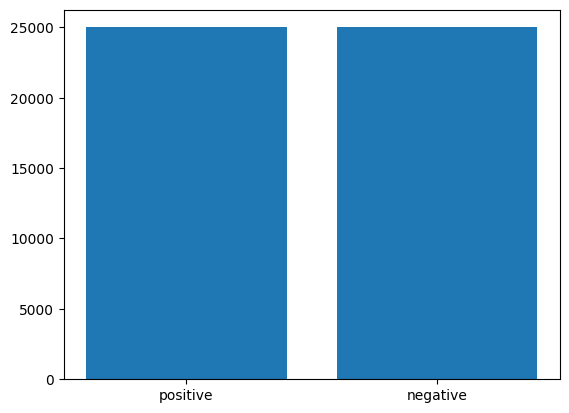

In [23]:
variables=["positive","negative"]
values=[25000,25000]
plt.bar(range(len(variables)),values)
plt.xticks(range(len(variables)),variables)
plt.show()
#now from the visualization i can see that diff of the data    


In [4]:
tag_re=re.compile(r'<[^>]+>')
def remove_tags(text):
    return tag_re.sub('',text)

In [5]:
#downlaoding the stopwords
m=nltk.download("stopwords")



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anjil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words=stopwords.words("english")

#these are the stop words in the english dictionary

In [262]:
def preprocess_text(sen):
    sentence=sen.lower()
    sentece=remove_tags(sentence)
    sentence=re.sub('[^a-zA-Z]',' ',sentence)
    sentence=word_tokenize(sentence)
    stop_words=set(stopwords.words('english'))
    sentence=[word for word in sentence if len(word)!=2 and word not in stop_words]
    sentence=' '.join(sentence)
    return sentence

In [267]:
X=[]
sentence=list(df['review'])
for sen in sentence:
    
    X.append(preprocess_text(sen))


In [266]:
Y=df["sentiment"]
M=[]
Y=Y[:20000]
for i in Y[:20000]:
    if i=="positive":
        M.append(1)
    else:
        M.append(0)
Y=np.array(M)

In [268]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [133]:
len(X_train)

16000

In [269]:
word_tokenizer=Tokenizer()
word_tokenizer.fit_on_texts(X_train)
#texts lai chai sequences ma lani kam garyo yesle chai like index assign garni type
X_train=word_tokenizer.texts_to_sequences(X_train)
X_test=word_tokenizer.texts_to_sequences(X_test)


In [139]:
vocab_length=len(word_tokenizer.word_index)+1
len(X_train)
#There are about 

16000

In [192]:
max_len=100
X_train=pad_sequences(X_train,padding="post",maxlen=max_len)
X_test=pad_sequences(X_test,padding="post",maxlen=max_len)
X_train

array([[2030,  143, 2923, ...,  253, 4652, 7969],
       [   2, 1349, 1349, ...,    0,    0,    0],
       [ 490, 1275,  920, ...,    4,  650, 1984],
       ...,
       [3777,    2, 1739, ...,    0,    0,    0],
       [ 232,   78,  674, ...,    0,    0,    0],
       [ 383,    1,  147, ...,    0,    0,    0]])

In [108]:
from numpy import asarray
from numpy import zeros

In [109]:
embedding_dictionary=dict()
glove_file=open(r"C:\Users\anjil\Documents\glove.twitter.27B\glove.twitter.27B.100d.txt",encoding='utf8')

In [110]:
for line in glove_file:
    records=line.split()
    word=records[0]
    vector_dimensions=asarray(records[1:],dtype="float32")
    embedding_dictionary[word]=vector_dimensions
glove_file.close()
    

In [111]:
embedding_matrix=zeros((vocab_length,100))
for word ,index in word_tokenizer.word_index.items():
    embedding_vector=embedding_dictionary.get(word)
    #embedding_dictionary consists of the word actual words
    if embedding_vector is not None:
        embedding_matrix[index]=embedding_vector
#yo last wala line le chai word ko tyo index lidai tesma chai value assign handi raxa.

In [145]:
snn_model=Sequential()
embedding_layer=Embedding(vocab_length,100,weights=[embedding_matrix],input_length=max_len,trainable=False)
snn_model.add(embedding_layer)
snn_model.add(Flatten())
snn_model.add(Dense(1,activation="sigmoid"))

In [146]:
snn_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc'])


In [150]:
snn_model_history=snn_model.fit(X_train,Y_train,batch_size=128,epochs=1,verbose=1,validation_data=(X_test,Y_test))

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - acc: 0.9916 - loss: 0.0755 - val_acc: 0.7340 - val_loss: 1.0143


In [261]:
snn_model_history.history
#tells about the history of model like loss  and accuracy

{'acc': [0.9894375205039978],
 'loss': [0.08054366707801819],
 'val_acc': [0.734000027179718],
 'val_loss': [1.0143043994903564]}

In [185]:
msg=pd.read_csv(file_path)
msg=msg[20000:20001]
msg

,review,sentiment
20000,I am a huge fan of Northern Exposure. Men In T...,negative


In [207]:
unseen_reviews=list(msg["review"])

man=[]
for sen in unseen_reviews:
    man.append(preprocess_text(sen))

In [209]:
word_tokenizer=Tokenizer()
word_tokenizer.fit_on_texts(man)
#texts lai chai sequences ma lani kam garyo yesle chai like index assign garni type
man=word_tokenizer.texts_to_sequences(man)
##yesma ra mathi ko texts_to_sequence ma error aairakhnu ko reason chai suru ma man ta string mai hunxa
#normally work garxa tara paxi pheri process garda sequence of integers banxa
#ani tya lower method bhannni hunxa which is only for the string type
#so error occuring.

In [215]:
#i just forget to do padding 
testing_data=pad_sequences(man,padding="post",maxlen=100)


In [218]:
#in model one of the important decision is likely to be how much is considered as good and how much 
#is considered bad
#i can use the same data for positive and negative giving the star

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
[[0.7811812]]


In [227]:
yes=snn_model.predict(testing_data,verbose=0)
if(yes>0.8):
    print("* * * * *\n")
    print("MASTERPIECE")
elif(yes>0.7):
    
    print("\n* * * *\n")
    print("VERY_GOOD\n")
elif(yes>0.6):
    print("* * *\n")
    print("NICE")
elif(yes>0.4):
    print("* *\n")
    print("QUITE_BAD")
else:
    print("*\n")
    print("NIGHTMARE")




* * * *

VERY_GOOD



In [271]:
!git init

Initialized empty Git repository in C:/Users/anjil/.git/


In [273]:
!git add sentiment_analysis_project.ipynb
